In [158]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [160]:
col_names = [
    'symboling',
    'normalized-losses',
    'make',
    'fuel-type',
    'aspiration',
    'num-of-doors',
    'body-style',
    'drive-wheels',
    'engine-location',
    'wheel-base',
    'length',
    'width',
    'height',
    'curb-weight',
    'engine-type',
    'num-of-cylinders',
    'engine-size',
    'fuel-system',
    'bore',
    'stroke',
    'compression-ratio',
    'horsepower',
    'peak-rpm',
    'city-mpg',
    'highway-mpg',
    'price'
]

In [162]:
cars = pd.read_csv('imports-85.data',  names=col_names, header=None)

In [164]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [166]:
continuous_values = [
    'normalized-losses',
    'wheel-base',
    'length',
    'width',
    'height',
    'curb-weight',
    'engine-size',
    'bore',
    'stroke',
    'compression-ratio',
    'horsepower',
    'peak-rpm',
    'city-mpg',
    'highway-mpg',
    'price'
]

In [168]:
cars = cars[continuous_values]

In [170]:
cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
1,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
2,?,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450


In [172]:
clean_cars = cars.copy()
clean_cars.replace('?', np.nan, inplace=True)
clean_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   normalized-losses  164 non-null    object 
 1   wheel-base         205 non-null    float64
 2   length             205 non-null    float64
 3   width              205 non-null    float64
 4   height             205 non-null    float64
 5   curb-weight        205 non-null    int64  
 6   engine-size        205 non-null    int64  
 7   bore               201 non-null    object 
 8   stroke             201 non-null    object 
 9   compression-ratio  205 non-null    float64
 10  horsepower         203 non-null    object 
 11  peak-rpm           203 non-null    object 
 12  city-mpg           205 non-null    int64  
 13  highway-mpg        205 non-null    int64  
 14  price              201 non-null    object 
dtypes: float64(5), int64(4), object(6)
memory usage: 24.2+ KB


In [174]:
clean_cars = clean_cars.dropna(how='any',axis=0)

In [178]:
clean_cars = clean_cars.astype('float')

In [180]:
clean_cars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 160 entries, 3 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   normalized-losses  160 non-null    float64
 1   wheel-base         160 non-null    float64
 2   length             160 non-null    float64
 3   width              160 non-null    float64
 4   height             160 non-null    float64
 5   curb-weight        160 non-null    float64
 6   engine-size        160 non-null    float64
 7   bore               160 non-null    float64
 8   stroke             160 non-null    float64
 9   compression-ratio  160 non-null    float64
 10  horsepower         160 non-null    float64
 11  peak-rpm           160 non-null    float64
 12  city-mpg           160 non-null    float64
 13  highway-mpg        160 non-null    float64
 14  price              160 non-null    float64
dtypes: float64(15)
memory usage: 20.0 KB


In [182]:
normalized_cars=(clean_cars-clean_cars.mean())/clean_cars.std()

In [186]:
normalized_cars['price'] = clean_cars['price']

In [188]:
normalized_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
3,1.199357,0.302953,0.370653,0.310093,0.185034,-0.254628,-0.331909,-0.405604,0.552964,-0.037379,0.199995,0.824754,-0.412130,-0.321187,13950.0
4,1.199357,0.225490,0.370653,0.412815,0.185034,0.758061,0.555922,-0.405604,0.552964,-0.552510,0.624475,0.824754,-1.398776,-1.563240,17450.0
6,1.030829,1.464896,1.764730,2.980870,0.799984,0.799650,0.555922,-0.405604,0.552964,-0.423727,0.461214,0.824754,-1.234335,-1.097470,17710.0
8,1.030829,1.464896,1.764730,2.980870,0.887834,1.302875,0.391509,-0.630031,0.552964,-0.475241,1.440783,0.824754,-1.563217,-1.873754,23875.0
10,1.985820,0.574073,0.387971,-0.408963,0.185034,-0.134020,-0.364792,0.753933,-1.486397,-0.346458,0.167343,1.469512,-0.576571,-0.476444,16430.0


In [190]:
train_cars = normalized_cars.iloc[:120]
test_cars = normalized_cars.iloc[120:]

In [192]:
grid_search = [1,2,3,4,5,6,7,8,9,10]

In [196]:
features = train_cars.columns.tolist()
features.remove('price')

In [212]:
errors = {}

In [220]:
for feature in features:
    errors[feature] = {}
    for k in grid_search:
        knn = KNeighborsRegressor(n_neighbors=k, algorithm='brute')
        knn.fit(train_cars[[feature]], train_cars['price'])
        predictions = knn.predict(test_cars[[feature]])
        mse = mean_squared_error(test_cars['price'], predictions)
        rmse = np.sqrt(mse)
        errors[feature][k] = (mse, rmse)

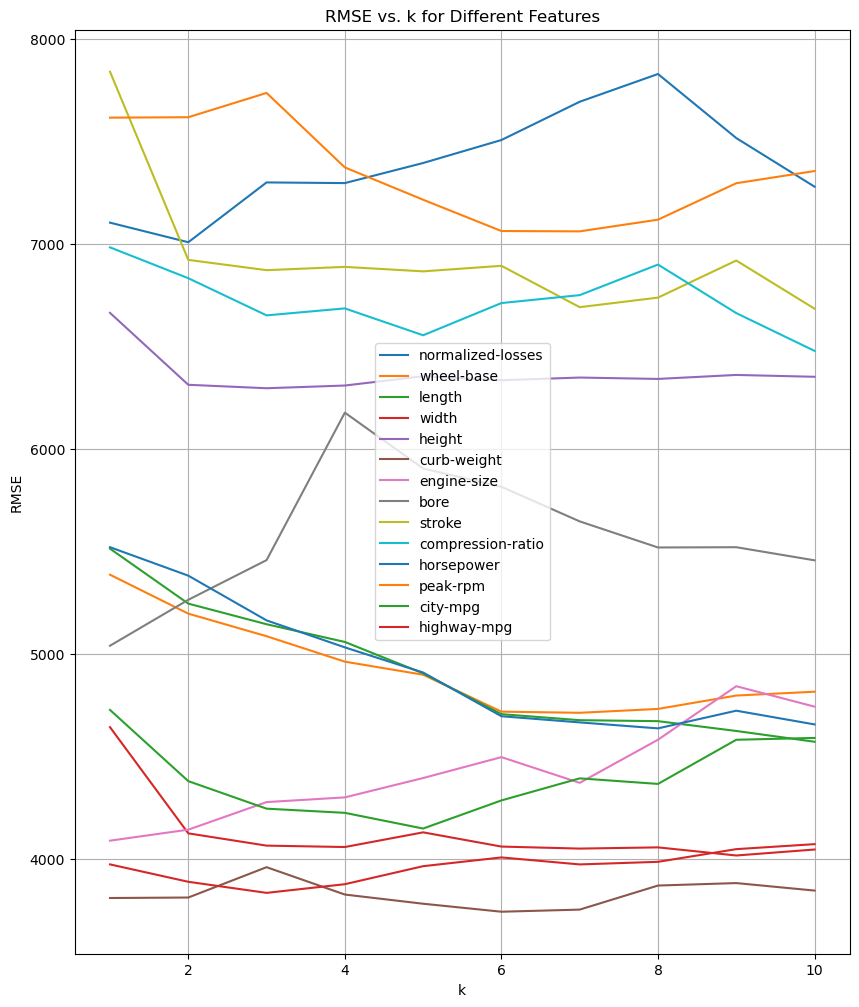

In [255]:
plt.figure(figsize=(10, 12))

for feature in errors:
    k_values = []
    rmse_values = []
    
    for k in errors[feature]:
        k_values.append(k)
        _, rmse = errors[feature][k]
        rmse_values.append(rmse)
    
    plt.plot(k_values, rmse_values, label=feature)

plt.title('Univaried RMSE vs. k for Different Features')
plt.xlabel('k')
plt.ylabel('RMSE')
plt.legend()
plt.grid(True)
plt.show()

In [257]:
averages = {}
for feature, values in errors.items():
    avg = sum(val[1] for val in values.values()) / len(values)
    averages[feature] = avg

print(averages)

{'normalized-losses': 7391.196081778713, 'wheel-base': 4930.289940104651, 'length': 4911.549904586078, 'width': 4125.130267448125, 'height': 6366.313135964658, 'curb-weight': 3828.496860884768, 'engine-size': 4423.826769332508, 'bore': 5579.473733423081, 'stroke': 6930.032629375113, 'compression-ratio': 6719.665230399065, 'horsepower': 4938.240038866859, 'peak-rpm': 7343.724233240433, 'city-mpg': 4394.05701701098, 'highway-mpg': 3962.62568846388}


In [259]:
sorted_averages = dict(sorted(averages.items(), key=lambda item: item[1]))

print(sorted_data)

{'curb-weight': 3828.496860884768, 'highway-mpg': 3962.62568846388, 'width': 4125.130267448125, 'city-mpg': 4394.05701701098, 'engine-size': 4423.826769332508, 'length': 4911.549904586078, 'wheel-base': 4930.289940104651, 'horsepower': 4938.240038866859, 'bore': 5579.473733423081, 'height': 6366.313135964658, 'compression-ratio': 6719.665230399065, 'stroke': 6930.032629375113, 'peak-rpm': 7343.724233240433, 'normalized-losses': 7391.196081778713}


In [267]:
multivaried_parameters = list(sorted_data.keys())[:5]
print(multivaried_parameters)

['curb-weight', 'highway-mpg', 'width', 'city-mpg', 'engine-size']


In [291]:
multi_errors = {}
for k in grid_search:
    multi_knn = KNeighborsRegressor(n_neighbors=k, algorithm='brute')
    multi_knn.fit(train_cars[multivaried_parameters], train_cars['price'])
    predictions = multi_knn.predict(test_cars[multivaried_parameters])
    multi_mse = mean_squared_error(test_cars['price'], predictions)
    multi_rmse = np.sqrt(multi_mse)
    multi_errors[k] = (multi_mse, multi_rmse)

In [293]:
print(multi_errors)

{1: (11307550.066666666, 3362.67007996126), 2: (12155091.972916666, 3486.415347160557), 3: (12393504.449074073, 3520.440945261555), 4: (13699689.601041667, 3701.3091739331458), 5: (13137719.133666666, 3624.5991686897833), 6: (12828837.65439815, 3581.7366813318577), 7: (12547443.708333334, 3542.2371050415773), 8: (13194057.124088543, 3632.3624714624148), 9: (13341581.016152266, 3652.612902587991), 10: (13551889.57, 3681.289117958545)}


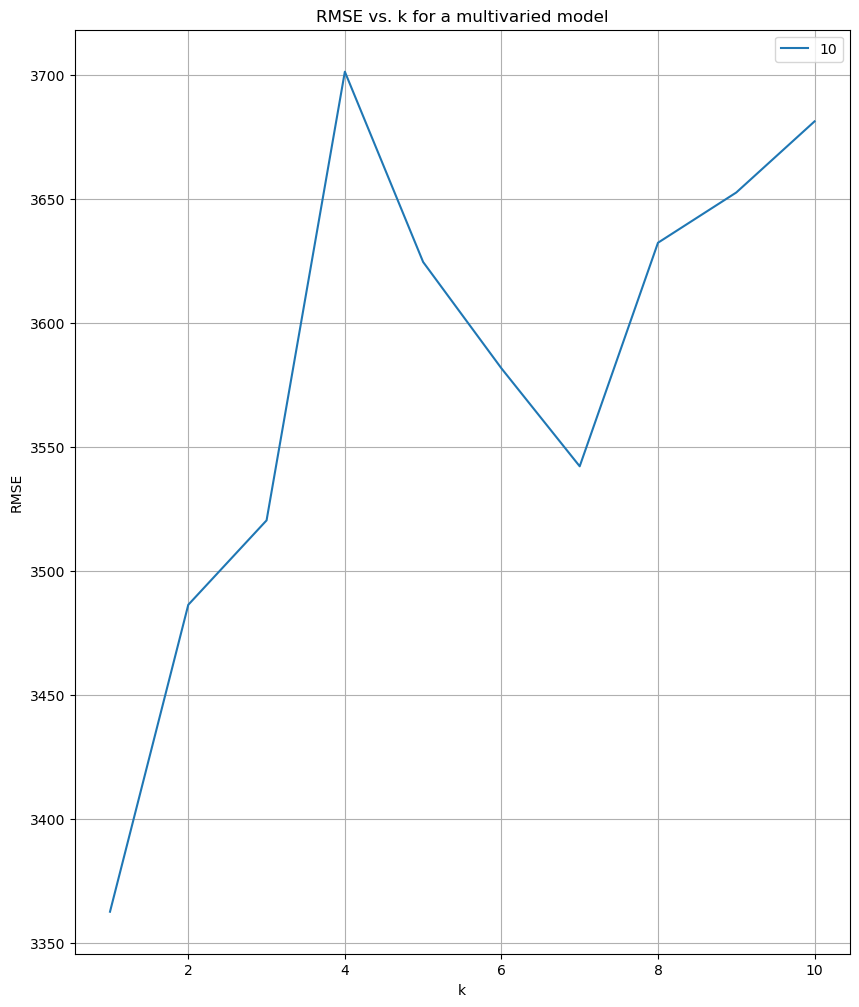

In [297]:
plt.figure(figsize=(10, 12))
k_values = []
rmse_values = []

for k in multi_errors:
    k_values.append(k)
    _, rmse = multi_errors[k]
    rmse_values.append(rmse)
    
plt.plot(k_values, rmse_values, label=k)
plt.title('RMSE vs. k for a multivaried model')
plt.xlabel('k')
plt.ylabel('RMSE')
plt.legend()
plt.grid(True)
plt.show()